In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from lofo import LOFOImportance, FLOFOImportance, Dataset, plot_importance


In [6]:
from lofo.data.test_data import generate_test_data, generate_unstructured_test_data

In [12]:
df

,A,B,C,D,D2,target,binary_target
0,0.548814,0.592880,0.811518,0.413962,0.443227,1.486305,1
1,0.715189,0.010064,0.476084,0.629618,0.686270,0.529949,0
2,0.602763,0.475826,0.523156,0.778584,0.792326,1.434674,1
3,0.544883,0.708770,0.250521,0.851558,0.886529,1.952046,1
4,0.423655,0.043975,0.605043,0.816413,0.821734,0.480267,0
...,...,...,...,...,...,...,...
995,0.097676,0.791282,0.941687,0.349639,0.371455,1.637561,1
996,0.514922,0.721198,0.546133,0.434874,0.458419,1.694228,1
997,0.938412,0.480108,0.323614,0.830003,0.849742,1.878405,1
998,0.228647,0.643864,0.813545,0.932806,0.972675,1.597750,1


In [7]:
df = generate_test_data(1000)
df.head()

lr = LinearRegression()
lr.fit(df[["A", "B", "C", "D"]], df["target"])

fi = FLOFOImportance(lr, df, ["A", "B", "C", "D"], 'target', scoring="neg_mean_absolute_error")

importances = fi.get_importance()
importances

  0%|          | 0/4 [00:00<?, ?it/s]

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3,val_imp_4,val_imp_5,val_imp_6,val_imp_7,val_imp_8,val_imp_9
1,B,0.540217,0.016008,0.532118,0.544225,0.513259,0.524307,0.525612,0.542536,0.550588,5.682745e-01,0.559869,0.541383
3,D,0.089187,0.002629,0.088832,0.086291,0.087612,0.085380,0.086004,0.090378,0.091582,9.345964e-02,0.090800,0.091527
0,A,0.088167,0.002935,0.090739,0.086158,0.085259,0.093299,0.088281,0.088402,0.083172,9.189529e-02,0.087086,0.087376
2,C,0.000002,0.000033,0.000088,-0.000020,-0.000012,-0.000027,-0.000016,0.000004,0.000031,-8.312825e-07,-0.000002,-0.000021


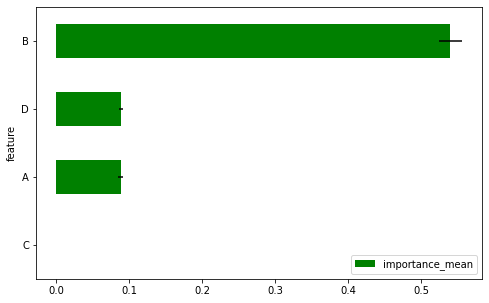

In [11]:
plot_importance(importances, figsize=(8, 5))